In [25]:
import numpy as np
import pandas as pd
from matplotlib.mlab import PCA
import matplotlib.pyplot as plt

import lipinski as lip

from rdkit.Chem import AllChem as ch
from rdkit.Chem import Draw as d
from rdkit import DataStructs

In [37]:
# pca computing

def pca(frame, standardize=True):
    p = PCA(frame, standardize=standardize)
    res = pd.DataFrame(p.Y)
    res.index=frame.index
    return res

# visualization

def visualize_scatter(matrix, axis): #, labels=None, **kwargs):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(x=matrix[axis[0]],y=matrix[axis[1]])
    # ax.scatter(x=matrix[x:y][axis[0]],y=matrix[x:y][axis[1]], C="red")  for different color points, show has to be used after all plot processing
    for idx in matrix.index:
        pass
        #ax.annotate(idx, (matrix[axis[0]][idx],matrix[axis[1]][idx]))
    return fig


In [15]:
suppl = ch.SDMolSupplier('../data/drugbank.sdf')

lip_func = [lip.num_hydrogen_bond_acceptors, lip.num_hydrogen_bond_donors, lip.MW, lip.logP, lip.TPSA, lip.num_rotatable_bonds]
mols = [x for x in suppl if x is not None]

drugbank = {}

for mol in mols:
    drugbank[mol.GetProp("DRUGBANK_ID")] = [f(mol) for f in lip_func]
    

In [28]:
keys = [k for k in drugbank.keys()]

series={}
index = ["HBA", "HBD", "MW", "logP", "TPSA", "RBs"]
for k in keys[:100]:
    sample_id = k
    row = drugbank[k]
    series[sample_id] = pd.Series(row, index=index)
frame1 = pd.DataFrame(series, index=index).transpose()

series={}
for k in keys[1000:1100]:
    sample_id = k
    row = drugbank[k]
    series[sample_id] = pd.Series(row, index=index)
frame2 = pd.DataFrame(series, index=index).transpose()


In [38]:
pca1 = pca(frame1)
pca2 = pca(frame2)
pca3 = pca(frame2, standardize=False)

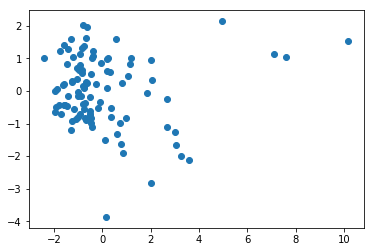

In [39]:
visualize_scatter(pca1, (0,1))

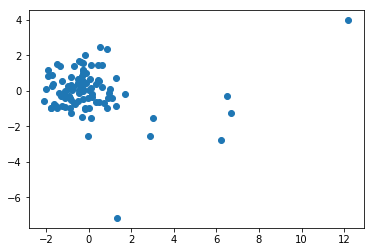

In [40]:
visualize_scatter(pca2, (0,1))

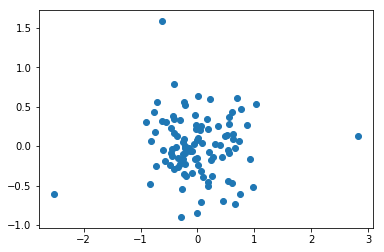

In [41]:
visualize_scatter(pca2, (2,3))

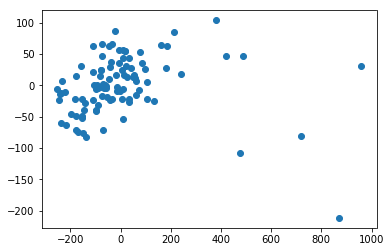

In [42]:
visualize_scatter(pca3, (0,1))